# Día 2

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

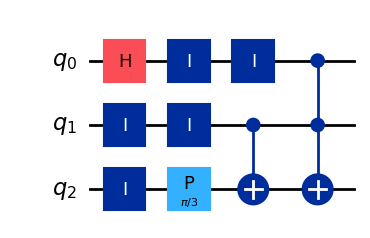

<IPython.core.display.Latex object>

In [17]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator

c = QuantumCircuit(3)

c.h(0)
c.id(1)
c.id(2)

c.id(0)
c.id(1)
c.p(np.pi/3,2)

c.id(0)
c.cx(1,2)
c.ccx(0,1,2)

display(c.draw('mpl'))

op = Operator(c)
display(array_to_latex(op))